In [58]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [60]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Calculating some basic metrics

In [61]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
numerical_columns = df_iris.select_dtypes(include=['number'])
numerical_columns.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [63]:
# mean of each column
numerical_columns.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [64]:
# median of each column
numerical_columns.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [65]:
# mode of each column based on interval
n = len(df_iris)
k = int(np.ceil(1 + 3.322 * np.log10(n)))

df_bins = df_iris.copy()
for column in numerical_columns.columns:
    df_bins[column] = pd.cut(df_iris[column], bins=k)

intervals_mode = df_bins.mode().iloc[0]
intervals_mode

sepal length (cm)         (4.7, 5.1]
sepal width (cm)        (2.8, 3.067]
petal length (cm)     (0.994, 1.656]
petal width (cm)     (0.0976, 0.367]
species                       setosa
Name: 0, dtype: object

In [66]:
# variance of each column
numerical_columns.var(ddof=0)

sepal length (cm)    0.681122
sepal width (cm)     0.188713
petal length (cm)    3.095503
petal width (cm)     0.577133
dtype: float64

In [67]:
# standard deviation of each column
numerical_columns.std(ddof=0)

sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
dtype: float64

In [68]:
# metrics of each column
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
# sample
df_iris.sample(20, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor


In [70]:
# moving averages

numerical_columns.rolling(window=2).sum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,NaN,NaN,NaN
1,10.0,6.5,2.8,0.4
2,9.6,6.2,2.7,0.4
3,9.3,6.3,2.8,0.4
4,9.6,6.7,2.9,0.4
...,...,...,...,...
145,13.4,6.3,10.9,4.8
146,13.0,5.5,10.2,4.2
147,12.8,5.5,10.2,3.9
148,12.7,6.4,10.6,4.3


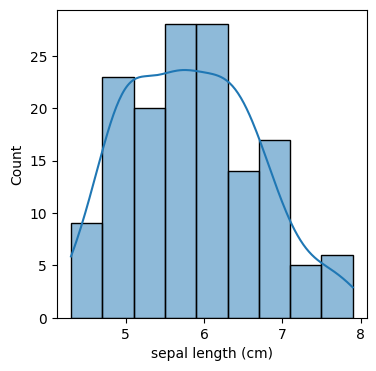

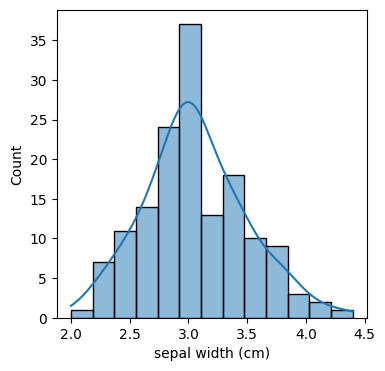

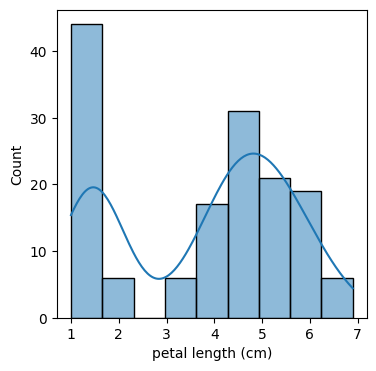

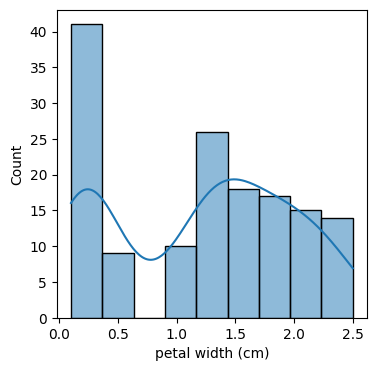

In [71]:
# normal distribution

for col in numerical_columns:
    plt.figure(figsize=(4,4))
    sns.histplot(numerical_columns[col], kde=True)
    plt.show()
#numerical_columns.hist(bins=10)

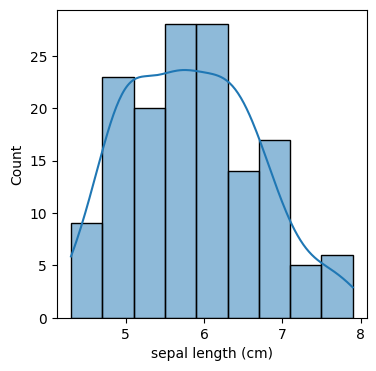

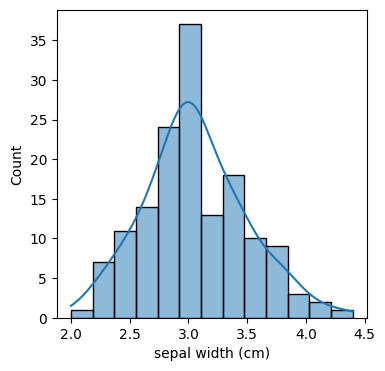

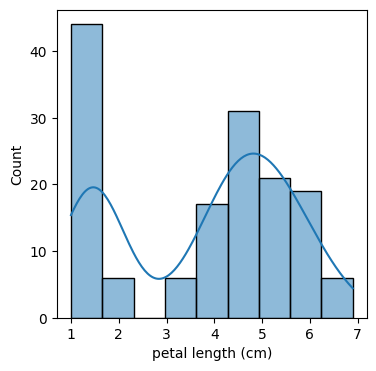

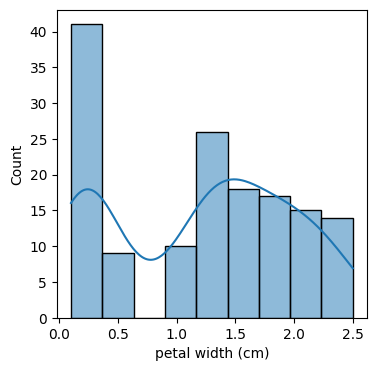

In [72]:
for column in numerical_columns:
    np.log(numerical_columns[column] + 1)
    plt.figure(figsize=(4,4))
    sns.histplot(numerical_columns[column], kde=True)
    plt.show()
    

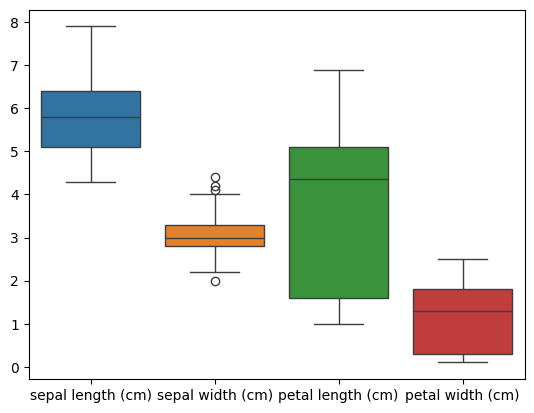

In [73]:
sns.boxplot(numerical_columns)
plt.show()